In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
# importing necessory libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# quality (score between 0 and 10) is the target variable
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

# Descriptive analysis

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


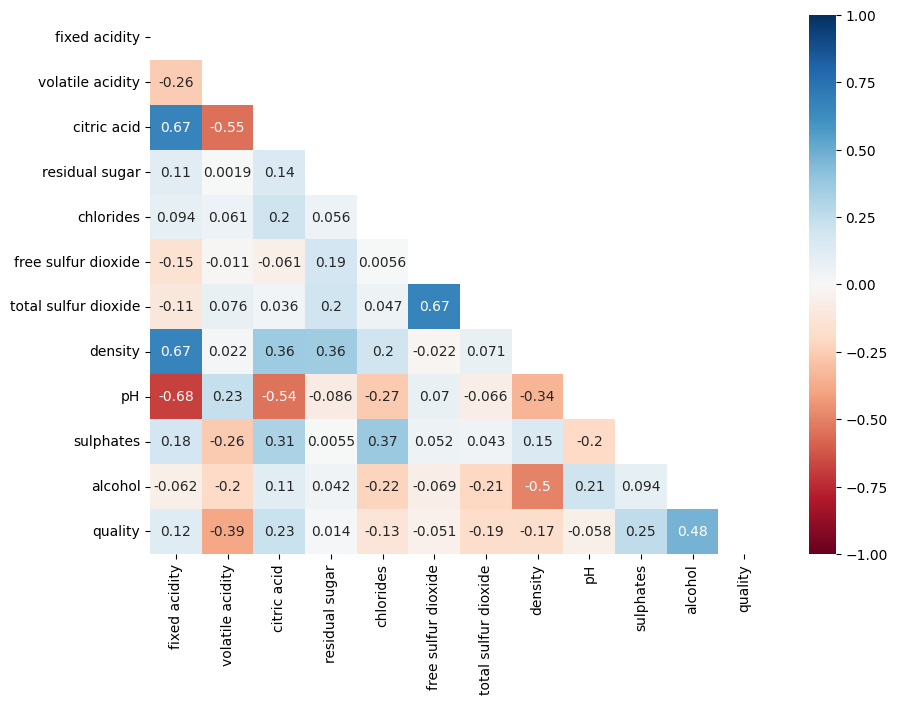

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(data=data.corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True,mask=np.triu(data.corr()))
plt.show()

# Univariate Analysis

In [14]:
len(data.columns.to_list())

12

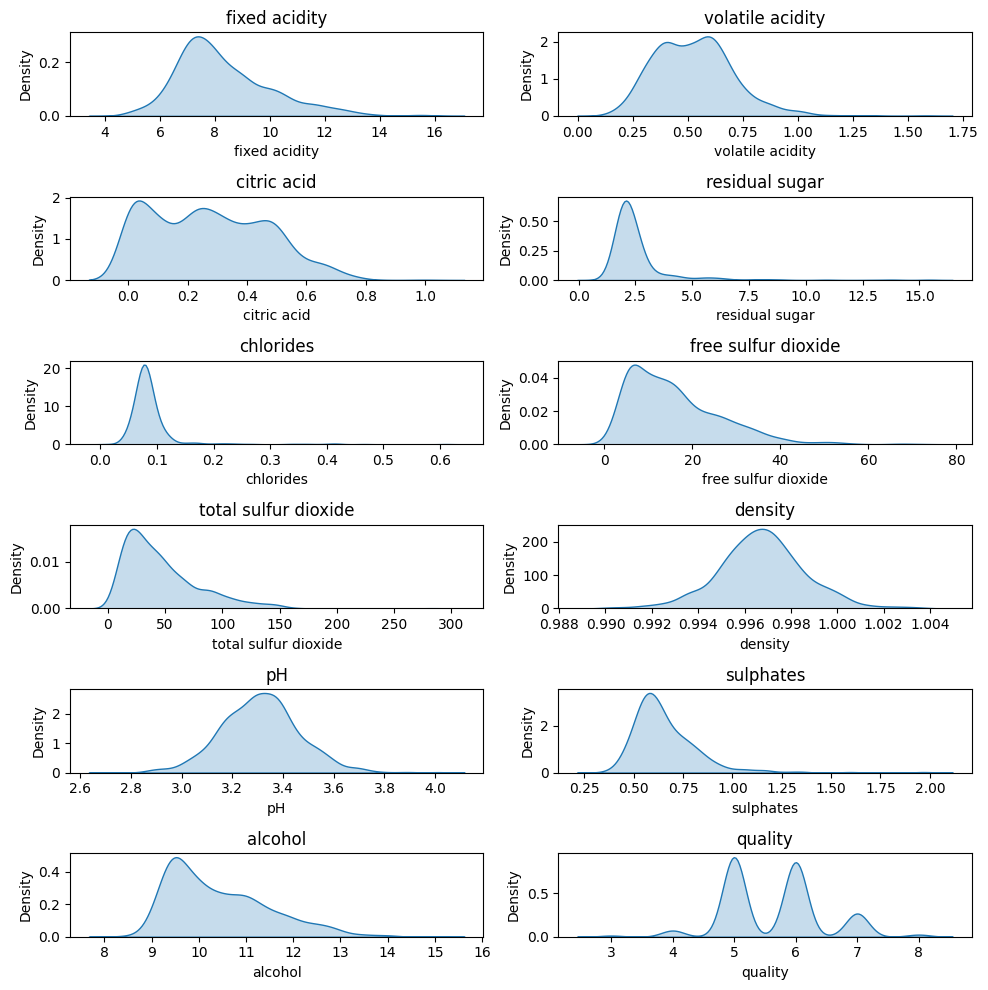

In [19]:
t=1
rows=6
cols=2
plt.figure(figsize=(10,10))
for i in data.columns.to_list():
    plt.subplot(rows,cols,t)
    sns.kdeplot(data=data,x=i,fill=True)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

# BiVariate Analysis

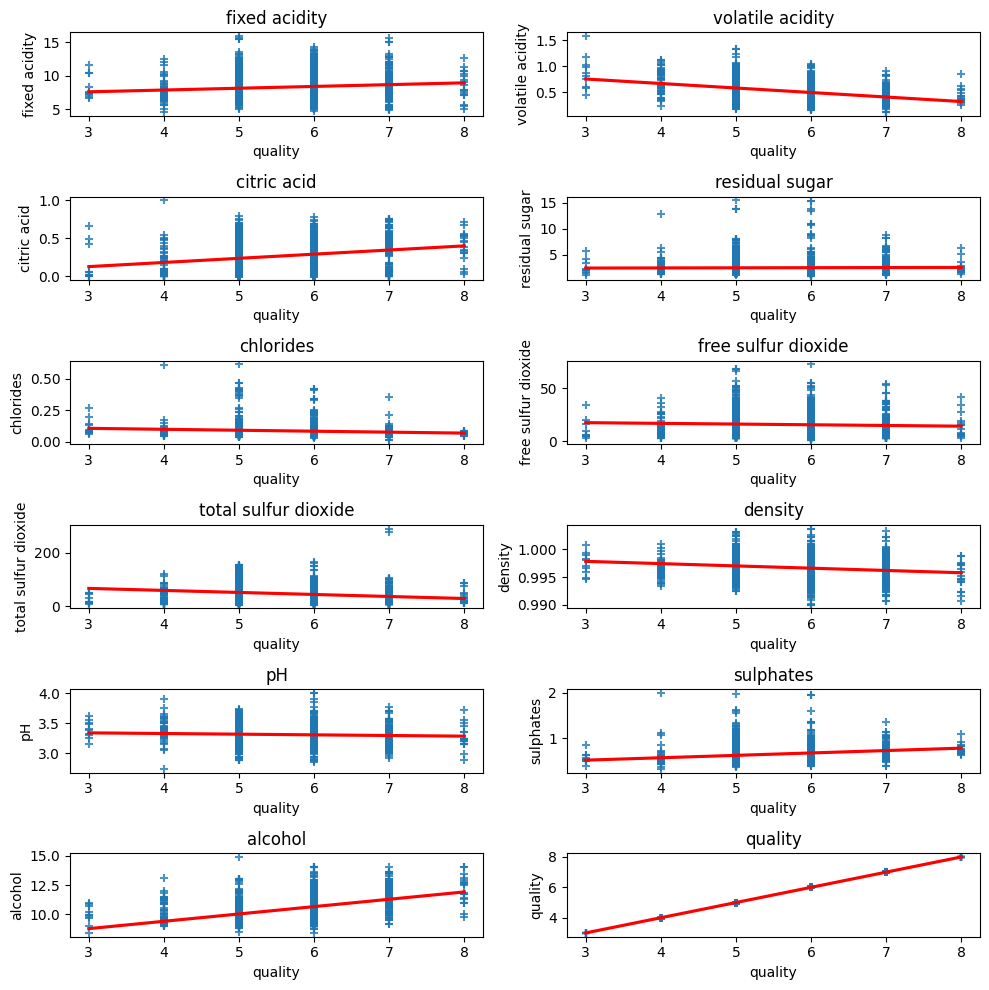

In [20]:
t=1
rows=6
cols=2
plt.figure(figsize=(10,10))
for i in data.columns.to_list():
    plt.subplot(rows,cols,t)
    sns.regplot(data=data,y=i,x='quality',ci=0,marker='+',line_kws={'color':'red'})
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

# Data Preprocessing

In [21]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

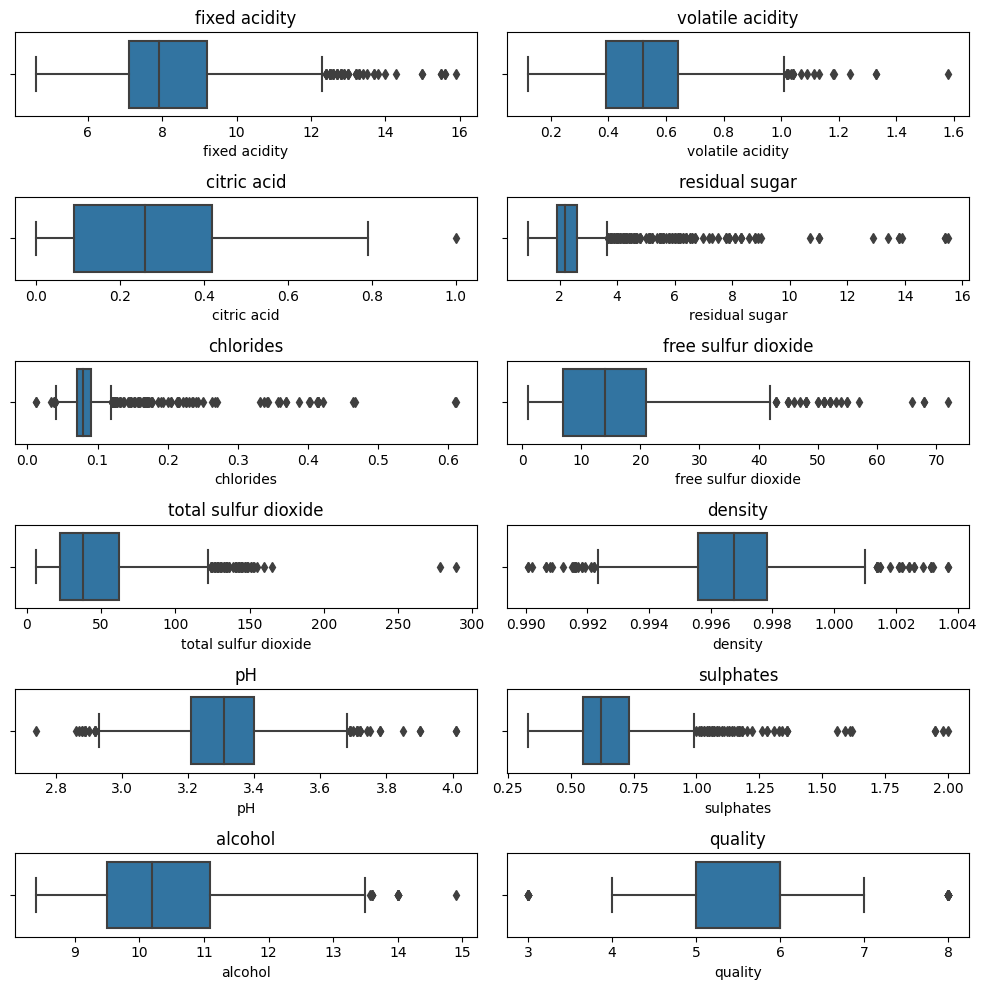

In [23]:
t=1
rows=6
cols=2
plt.figure(figsize=(10,10))
for i in data.columns.to_list():
    plt.subplot(rows,cols,t)
    sns.boxplot(data=data,x=i)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

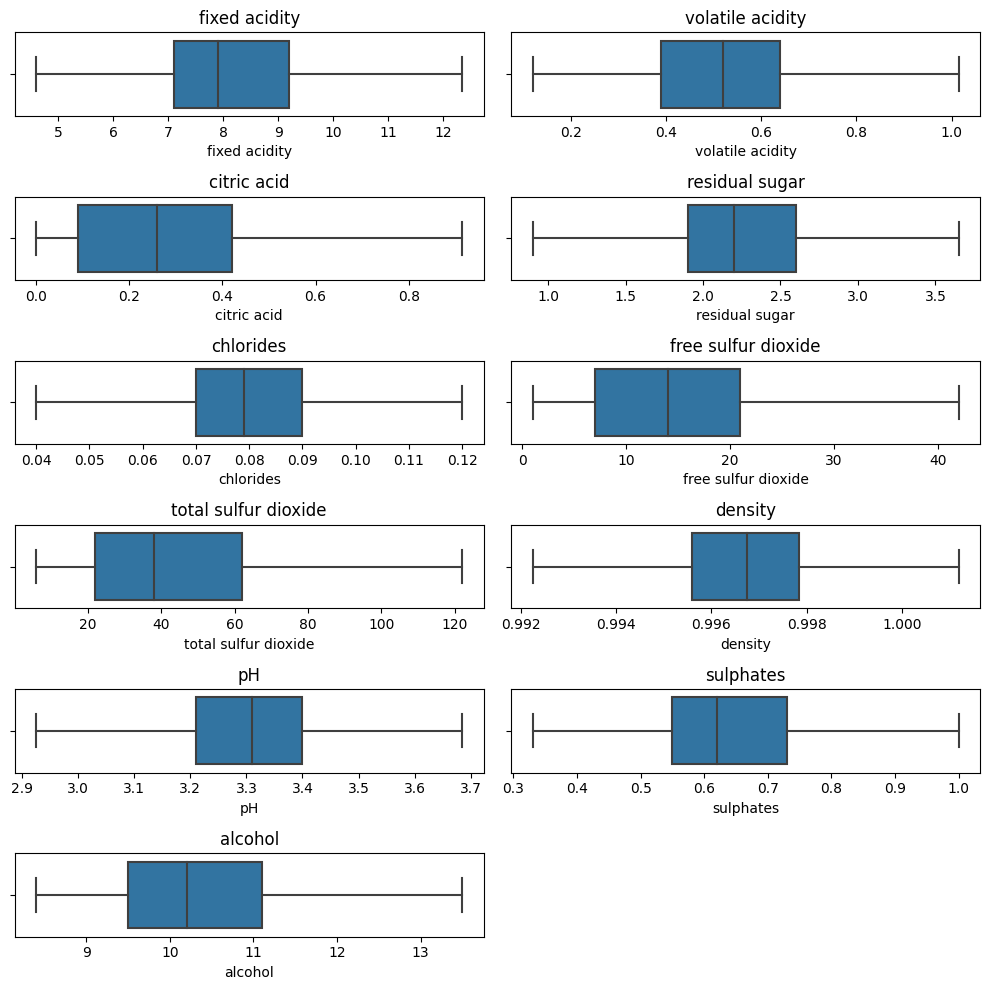

In [29]:
for i in data.drop(columns='quality').columns.to_list():
    q1,q3=data[i].quantile([0.25,0.75])
    iqr=q3-q1
    ul,ll=q3+1.5*iqr,q1-1.5*iqr
    data.loc[data[i]>ul,i]=ul
    data.loc[data[i]<ll,i]=ll
t=1
rows=6
cols=2
plt.figure(figsize=(10,10))
for i in data.drop(columns='quality').columns.to_list():
    plt.subplot(rows,cols,t)
    sns.boxplot(data=data,x=i)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X = data.drop(columns='quality')  # Features (independent variables)
y = data['quality']  # Target variable (dependent variable)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features (X) using StandardScaler
X_scaled = scaler.fit_transform(X)

# Optionally, convert back to DataFrame for easy analysis
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Model Building

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y, test_size=0.2, random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [54]:
import statsmodels.api as sma
x_train_corr=sma.add_constant(x_train)
model=sma.OLS(y_train,x_train_corr).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          4.18e-113
Time:                        17:18:36   Log-Likelihood:                -1258.0
No. Observations:                1279   AIC:                             2540.
Df Residuals:                    1267   BIC:                             2602.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6294      0.018    309.509      0.000       5.594       5.665
fixed acidity            0.0762      0.048      1.595      0.111      -0.017       0.170
volatile acidity        -0.1744      0.024     -7.132      0.000      -0.222      -0.126
citric acid             -0.0629      0.032     -1.992      0.047      -0.125      -0.001
residual sugar           0.0168      0.025      0.664      0.507      -0.033       0.067
chlorides               -0.0465      0.021     -2.223      0.026      -0.088      -0.005
free sulfur dioxide      0.0510      0.026      1.944      0.052      -0.000       0.102
total sulfur dioxide    -0.1028      0.027     -3.747      0.000      -0.157      -0.049
density                 -0.0387      0.048     -0.804      0.421      -0.133       0.056
pH                      -0.0535      0.032     -1.676      0.094      -0.116       0.009
sulphates                0.1625      0.021      7.802      0.000       0.122       0.203
alcohol                  0.2899      0.033      8.655      0.000       0.224       0.356
==============================================================================
Omnibus:                       31.072   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.765
Skew:                          -0.203   Prob(JB):                     9.47e-12
Kurtosis:                       3.888   Cond. No.                         7.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

model_xgb=XGBRegressor()

model_xgb.fit(x_train,y_train)

y_pred_xgb=model_xgb.predict(x_test)

print('r2 score : ',r2_score(y_test,y_pred_xgb))
print('MSE : ',mean_squared_error(y_test,y_pred_xgb))
print('RMSE : ',(mean_squared_error(y_test,y_pred_xgb))**0.5)
print('MAE : ',mean_absolute_error(y_test,y_pred_xgb))
print('MAPE : ',mean_absolute_percentage_error(y_test,y_pred_xgb))

r2 score :  0.4326338662901481
MSE :  0.37077709279032794
RMSE :  0.6089146843280493
MAE :  0.4332390397787094
MAPE :  0.07872451199129933


In [56]:
from sklearn.tree import DecisionTreeRegressor

model_dt=DecisionTreeRegressor(max_depth=5)

model_dt.fit(x_train,y_train)

y_pred_dt=model_dt.predict(x_test)

print('r2 score : ',r2_score(y_test,y_pred_dt))
print('MSE : ',mean_squared_error(y_test,y_pred_dt))
print('RMSE : ',(mean_squared_error(y_test,y_pred_dt))**0.5)
print('MAE : ',mean_absolute_error(y_test,y_pred_dt))
print('MAPE : ',mean_absolute_percentage_error(y_test,y_pred_dt))

r2 score :  0.3050073553856042
MSE :  0.45418176547803474
RMSE :  0.6739300894588657
MAE :  0.5124307786556244
MAPE :  0.09177366367660708


In [61]:
pd.concat([x_test,y_test],axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,-0.356966,0.192948,-0.981340,0.291550,1.841263,-0.171762,0.009392,0.198009,-0.469635,0.074202,-0.777282,6
124,-0.296555,-0.151899,-0.518741,-1.185548,0.045210,0.540024,1.853649,-0.411228,0.531671,-1.239255,-0.872116,5
350,1.455349,0.825167,-0.261741,0.619794,1.448377,0.133289,-0.385806,2.025718,-0.202620,2.409236,-0.492781,6
682,0.126318,-0.381798,0.200858,-0.118755,-0.179296,1.658544,0.404590,0.696475,0.131149,-0.801436,-0.587615,5
1326,-0.961071,-0.381798,-0.158941,-1.021426,-0.235423,0.234973,-0.385806,-1.075849,0.531671,-0.363617,0.171054,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1259,-0.900660,0.652744,-1.392540,0.619794,2.178023,-0.070078,-0.418739,-0.754616,0.865440,-0.144708,0.834890,6
1295,-1.021481,0.595269,-1.392540,2.178954,0.662603,2.675381,1.046786,-0.643845,-0.736650,-1.458164,-0.872116,5
1155,0.005497,0.422846,-0.107541,-0.200816,2.065770,-0.680181,-0.254073,-0.322611,-1.070419,-0.874406,-0.587615,5
963,0.307549,-1.473813,0.612058,-0.529060,1.055490,0.438340,-0.616338,-0.710307,-1.070419,0.293111,0.740057,6


In [62]:
y_test.unique()

array([6, 5, 7, 3, 8, 4])